In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt

In [42]:
mass = pd.read_csv("/Users/martinbordeau/Downloads/masstableDUZU.csv", sep=";")

In [43]:
mass

,N,Z,BE/A,MassExcess,BE
0,0,1,0.000000,-303.557556,NaN
1,0,2,27.002100,-37.861443,NaN
2,0,3,3.516299,13.665241,NaN
3,0,4,-1.166050,36.949719,NaN
4,0,5,-1.519803,47.955917,NaN
...,...,...,...,...,...
21895,120,176,7.052263,207.776855,NaN
21896,120,177,7.050978,209.177490,NaN
21897,120,178,7.054347,209.193848,NaN
21898,120,179,7.052330,210.813965,NaN


In [44]:
mass.drop(mass[(mass['BE/A'] < -0.5)].index, inplace=True)

mass

,N,Z,BE/A,MassExcess,BE
0,0,1,0.000000,-303.557556,NaN
1,0,2,27.002100,-37.861443,NaN
2,0,3,3.516299,13.665241,NaN
5,0,6,-0.117283,49.131973,NaN
6,0,7,0.879092,50.346008,NaN
...,...,...,...,...,...
21895,120,176,7.052263,207.776855,NaN
21896,120,177,7.050978,209.177490,NaN
21897,120,178,7.054347,209.193848,NaN
21898,120,179,7.052330,210.813965,NaN


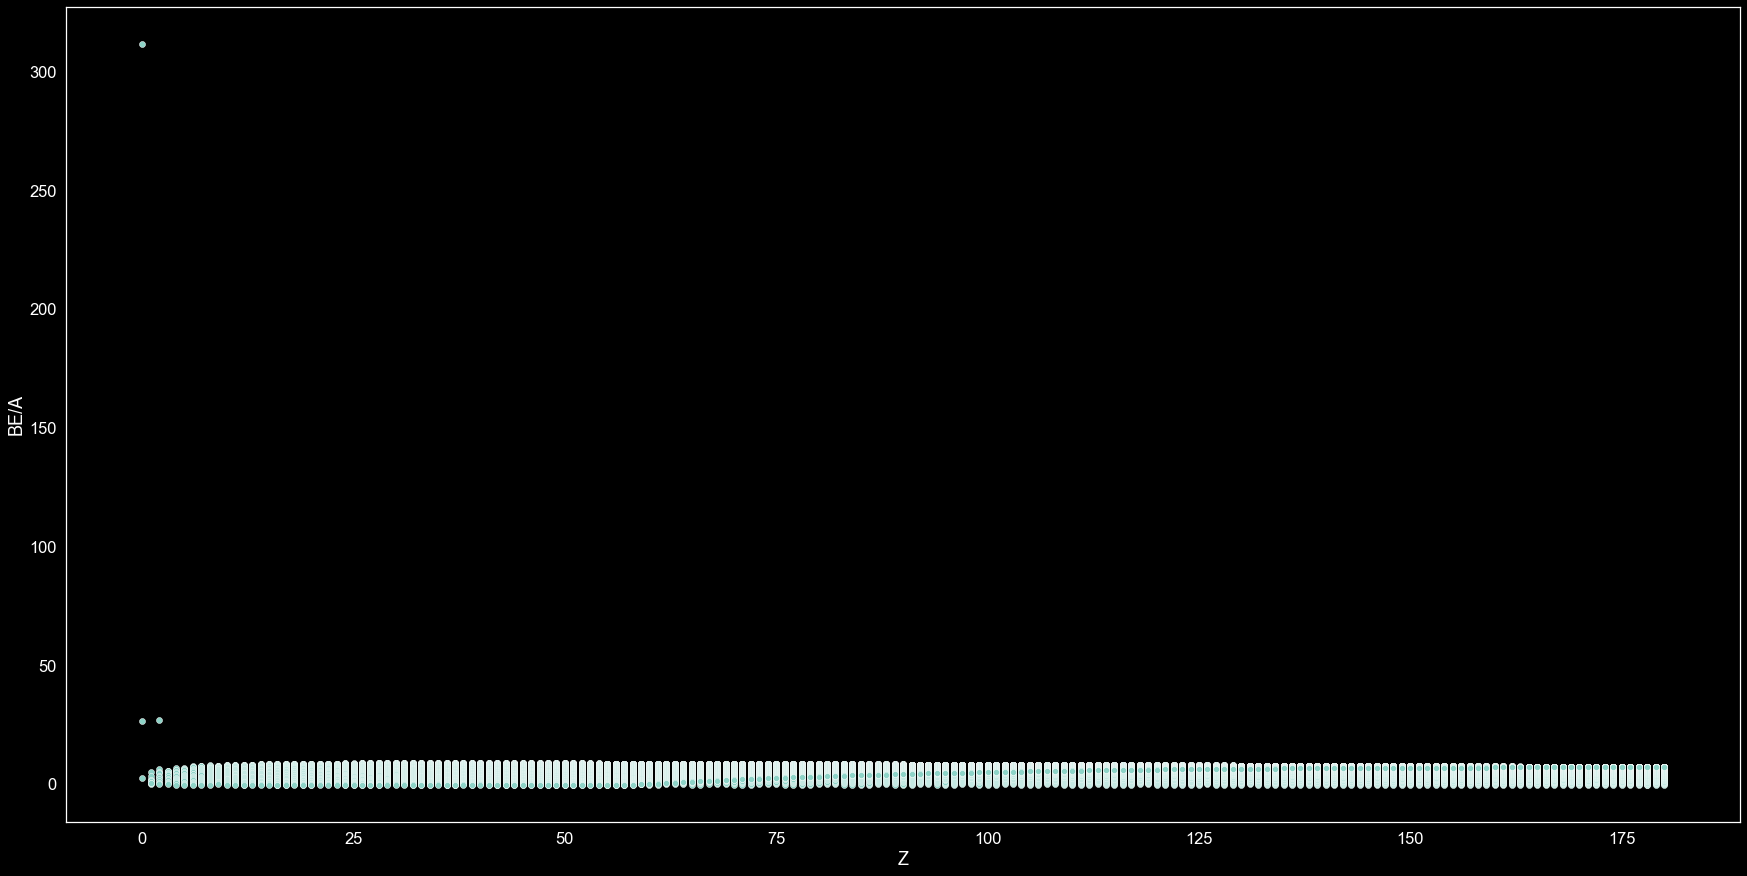

In [45]:
with plt.style.context('dark_background'):
    plt.figure(figsize =(30,15))
    plt.grid()
    sns.scatterplot( x='Z',y='BE/A', data=mass, palette="rainbow_r")

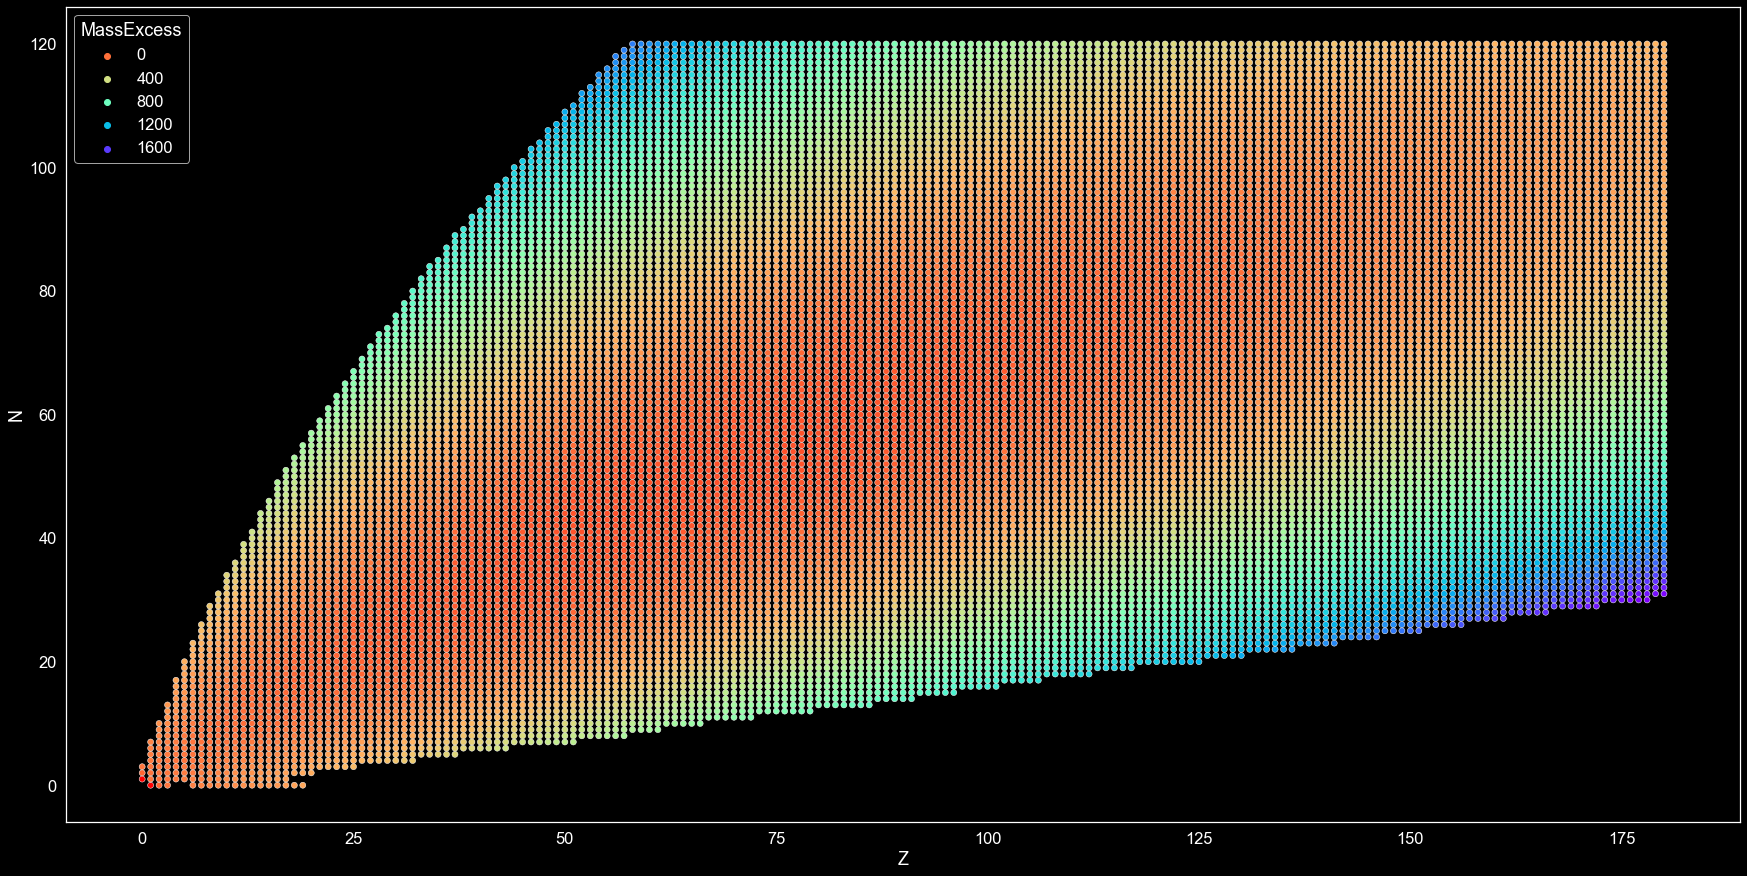

In [56]:
with plt.style.context('dark_background'):
    plt.figure(figsize =(30,15))
    plt.grid()
    sns.scatterplot(x='Z', y='N', hue="MassExcess", data=mass, palette="rainbow_r")

In [48]:
import tensorflow as tf
import keras as ks

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model = Sequential()
model.add(Dense(2, input_shape=(16,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2023-01-27 10:44:10.451219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model.fit(X, Y, epochs=100)

NameError: name 'X' is not defined

In [103]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

48/48 [==============================] - 0s 420us/step - loss: nan - accuracy: 0.2435
Accuracy: 24.35


In [165]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 34        
                                                                 
 dense_13 (Dense)            (None, 8)                 24        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
